# 数据可视化展示

## 预设

In [17]:
import sys
import os
import openpyxl
import csv
import re
import pandas as pd
import jieba
import jieba.posseg as psg
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cn2an
import functools

In [18]:
# 支持中文
print(matplotlib.matplotlib_fname())
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    if 'Song' in i:
        print(i)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 显示清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/opt/anaconda3/envs/sklearn/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
Songti SC


In [134]:
ExtraDictionaryPath = 'set/dict.txt'
StopWordPath = 'set/stopwords.txt'
KeywordTopNumber = 10
minLengthOfWord = 3
DataFilePath = 'data/西安项目分类后.pkl'
DictionaryFilePath = 'data/西安项目编码统计结果.pkl'
PeriodDataPath = 'data/西安项目时间统计结果test.pkl'

## 数据读取

In [204]:
dictionary_data_statistics = pd.read_pickle(DictionaryFilePath)
data_after_classification = pd.read_pickle(DataFilePath)
period_data = pd.read_pickle(PeriodDataPath)

## 数据处理

## 可视化

### 数据展示

In [205]:
df_to_show = period_data

In [196]:
# df_to_show.info()
df_to_show[df_to_show['平台']=='微博'].sample(10)

,内容,发布时间,点赞数,收藏数,转发数,user_tag,平台,评论数,分词,分词高频词,...,市民样貌,市民样貌选中词,积极判断框架,积极判断框架选中词,消极判断框架,消极判断框架选中词,事件框架,事件框架选中词,细节框架,细节框架选中词
17733,#打卡锦鲤大学#西安外事学院商学院具有跨专业综合仿真实训基地，学生在校就可进行模拟实习训练，...,2019-07-08 22:58:00,150,0,28,2272673835,微博,37,,,...,0,,0,,0,,0,,0,
20868,🍂“秋日穿搭合辑”🍂一年中最爱的秋终于来了，且今年西安的秋天格外长，好看的卫衣毛衣终于可以单...,2019-11-04 11:11:00,95,0,47,2028210187,微博,124,,,...,0,,0,,0,,0,,0,
25740,#国家记忆#抗日则生，不抗日则死！震惊中外的西安事变发生后，周恩来临危受命前往西安。暗流涌动...,2020-05-13 15:21:00,94,0,41,5963846236,微博,15,西安事变 西安事变 纪录片 传送门,西安事变 传送门 纪录片,...,0,,0,,0,,1,西安事变,1,纪录片
12460,#西安爆料#网友“寰空亮宇”：成都女孩子悄悄跑到西安向男友求婚，男友没出现，声泪俱下的录视频...,2018-12-03 20:07:00,48,0,10,2268603763,微博,54,女孩子,女孩子,...,0,,0,,0,,0,,1,女孩子
11345,#西安爆料#【西安一小区停车收费“太任性”物业：已经与业主进行协商】最近，西安南郊金域国际小...,2018-10-22 23:23:00,12,0,14,5921785591,微博,9,停车费 停车费 小区业主 工作人员 停车费 电视台,停车费 工作人员 小区业主 电视台,...,0,,0,,0,,0,,0,
47024,#西安交警1晚查处20多辆炸街改装摩托#西安交警干得漂亮这改装摩托还存在安全隐患，晚上出去炸...,2022-05-09 21:33:00,35,0,13,7573956824,微博,8,,,...,0,,0,,0,,0,,0,
28765,【#西安外国语大学回应学生喊楼#：将简化学生外出报备程序】9月20日晚，陕西#西安外国语大学...,2020-09-21 13:30:00,2096,0,99,1497087080,微博,200,外国语 外国语 外国语 大学生 后勤保障 工作人员 信息沟通 外国语,外国语 工作人员 后勤保障 信息沟通 大学生,...,0,,0,,0,,1,外国语,1,大学生
34139,走过的路，足下有痕，爱上的城，扎根长留。阳春三月#留在西安#，在历史名城拥抱世界，在十三朝古...,2021-03-20 20:44:00,1096,0,72,1748633474,微博,287,,,...,0,,0,,0,,0,,0,
50718,西安有哪些让人流连忘返，吃了再吃的特色小吃？,2019-03-11 16:41:00,33,0,24,5711473516,微博,19,特色小吃,特色小吃,...,0,,0,,0,,0,,0,
32070,遇见你，是我一生的幸运守护你，是我不忘的初心可丽金x西安地铁新年愿望号新年守护之旅温暖上线小...,2021-01-10 20:53:00,14,0,9,5672626284,微博,3,,,...,0,,0,,0,,0,,0,


### 可视化展示

### 总数统计图

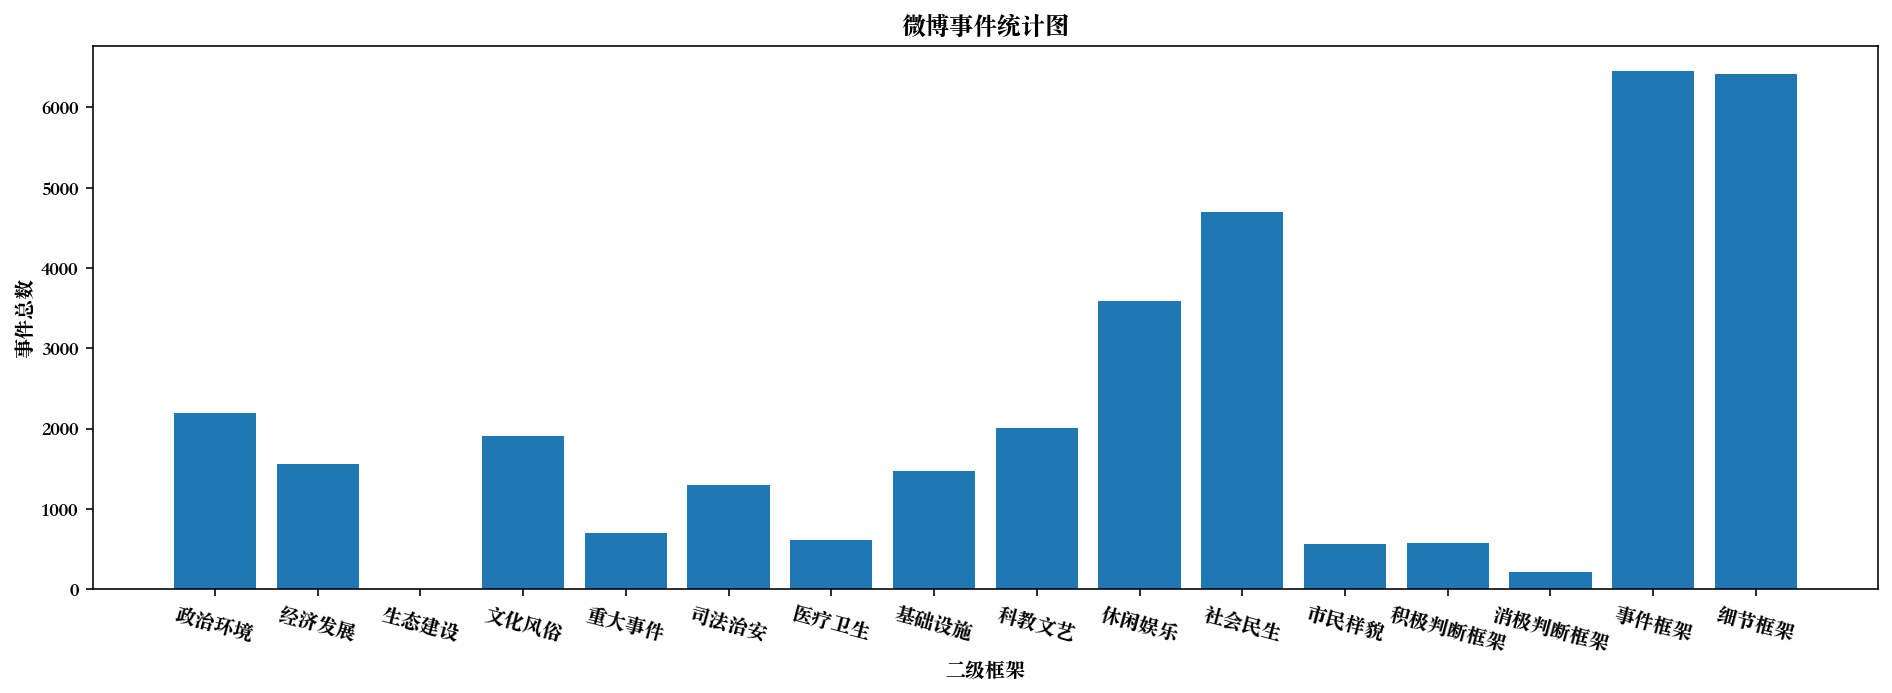

In [29]:
fig, ax = plt.subplots(figsize=(16, 5))
labels = df['二级框架类型']
counts = df['微博总数']
ax.bar(labels, counts)
ax.set_xlabel('二级框架')
ax.set_ylabel('事件总数')
ax.set_title('微博事件统计图')
plt.xticks(rotation=-15)    # 设置x轴标签旋转角度
plt.show()

### 时间序列图

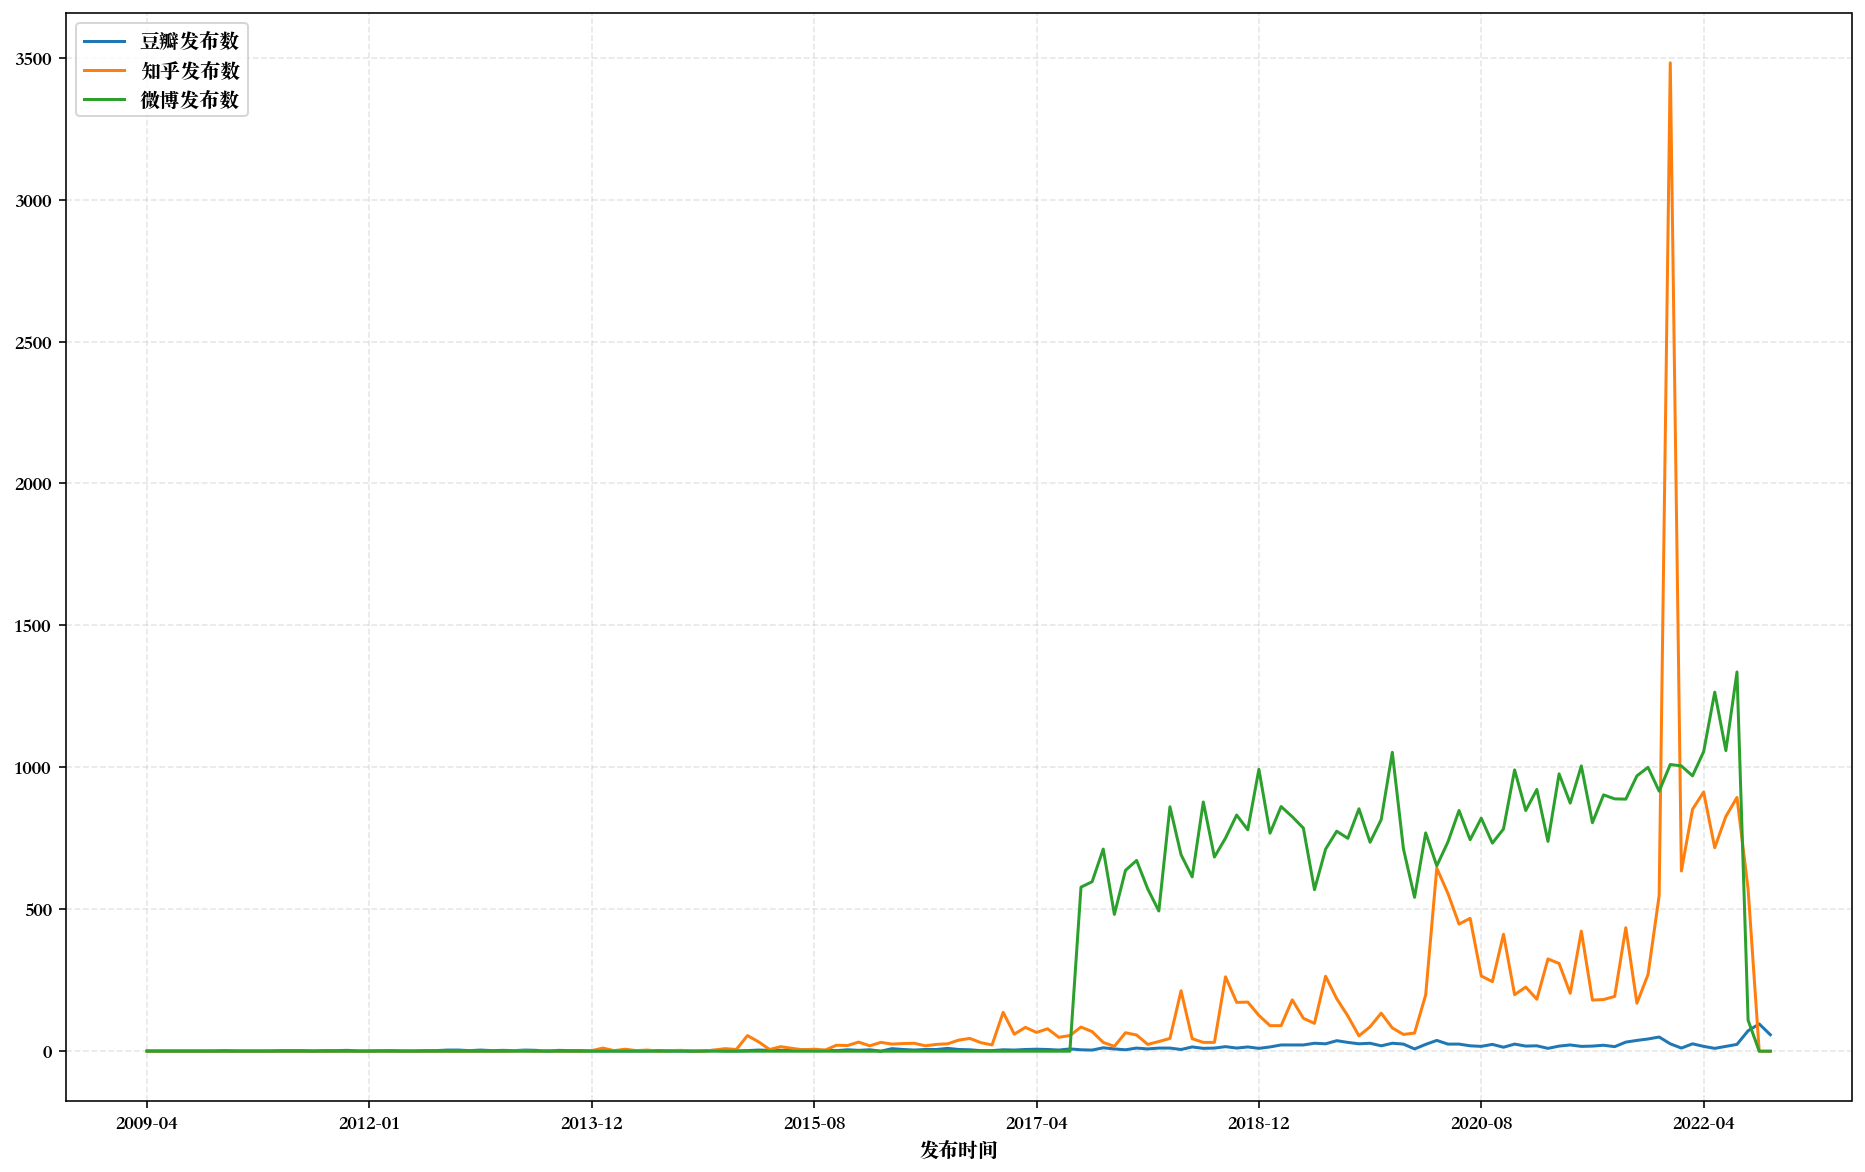

In [206]:
ax = df_to_show.loc[:, ['豆瓣发布数','知乎发布数','微博发布数']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
# plt.xlim((pd.Timestamp('2021-11'), pd.Timestamp('2022-9')))
# plt.xticks(pd.date_range(start ='2021-11', end = '2022-9', freq='M'))
plt.show()

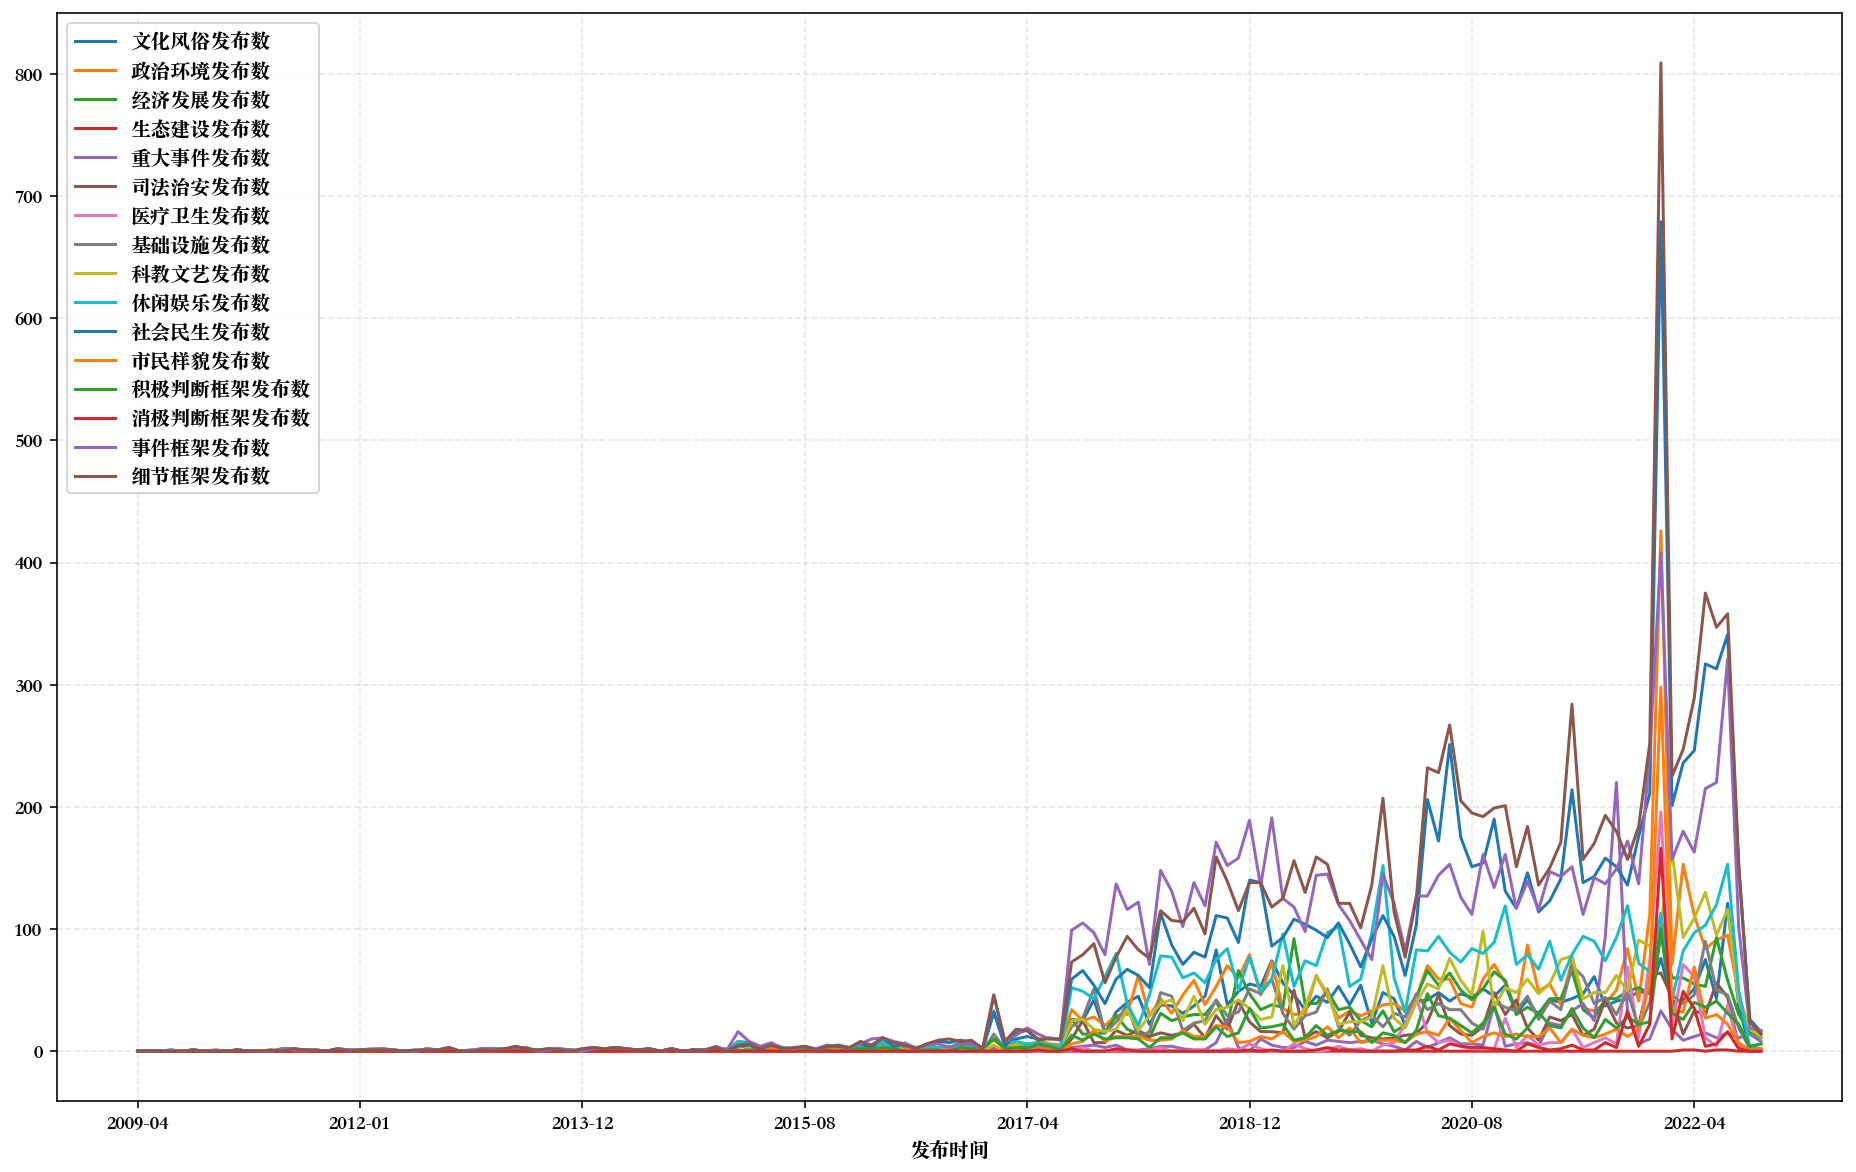

In [180]:
ax = df_to_show.iloc[:,1:].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
# plt.xlim((pd.Timestamp('2021-11'), pd.Timestamp('2022-9')))
# plt.xticks(pd.date_range(start ='2021-11', end = '2022-9', freq='M'))
plt.show()